# Creación y trabajo con Ensamble y Trayectorias

In [55]:
from prody import *
from pylab import *

In [56]:
# Genero una lista de archivos disponibles en el directorio de los modelos completos
import glob
main_PDBS_dir = "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/"
dir_ENS = main_PDBS_dir +  "PREP_ALL_ENSAMBLE/" # Hidrógenos agregados sin pka

# Es importante generar la lista ORDENADA!!
files_pdbs_cdk2_ENS = sorted( glob.glob(dir_ENS + "*") )
files_pdbs_cdk2_ENS[0:10]

['../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1aq1_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1b38_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1b39_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1buh_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1ckp_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1di8_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1dm2_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1e1v_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1e1x_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1e9h_ENS.pdb']

In [57]:
# Carga de los archivos pdb
# Obtengo el conjunto de estructuras pdb de CDK2
pdbs_cdk2_ENS = parsePDB( *[ pdb for pdb in files_pdbs_cdk2_ENS ])

@> 402 PDBs were parsed in 22.98s.                                                                   


In [13]:
type(pdbs_cdk2_ENS)

list

In [58]:
# Podemos crear ensambles de las proteínas alineando ya sea con Pisani o con el pocket
from Funciones.subsecuencias_cdk2 import get_pisani_residues, get_ricci_residues

In [59]:
ref_id = '1fin'
ens_f_tail = "_ENS"
ref_strc = parsePDB(dir_ENS + ref_id + ens_f_tail + ".pdb")
# Selecciones para alineamiento
sel_ref_pisani = ref_strc.select("ca resnum " + get_pisani_residues("str"))
sel_ref_ricci = ref_strc.select("ca resnum " + get_ricci_residues("str"))

@> 4848 atoms and 1 coordinate set(s) were parsed in 0.07s.


In [61]:
# Coordenadas de la CDK2 de refrencia tomando sólo los residuos de Pisiani
ens_cdk2 = PDBEnsemble("Ensamble CDK2 402 estructuras")
# Átomos de referencia
ens_cdk2.setAtoms( ref_strc )
# Coordenadas de referencia
ens_cdk2.setCoords( ref_strc.getCoords() )
# Ahora añadimos todas las estructuras al ensamble una a una
for structure in pdbs_cdk2_ENS:
    ens_cdk2.addCoordset(structure)
# O en una sola línea:
# ens_cdk2 = buildPDBEnsemble(pdbs_cdk2_ENS, ref=ref_strc, title="Ensamble CDK2 402 estructuras")

' O en una sola línea:'

In [53]:
len(ens_cdk2.getLabels() )

402

In [71]:
get_ricci_residues("str")

'8 9 10 11 12 13 14 15 16 17 18 19 30 31 32 33 64 65 79 80 81 82 83 84 85 86 87 88 89 90 129 130 131 132 133 134 143 144 145 146'

## Ensamble con PISANI
### Podemos crear un ensamble de estructuras alineadas por Pisani

In [64]:
# Seleccionamos y alineamos con base en los CA de los residuos de Pisani
ens_cdk2.setAtoms( sel_ref_pisani )
ens_cdk2.iterpose()

@> Starting iterative superposition:
@> Step #1: RMSD difference = 1.2765e-08
@> Iterative superposition completed in 0.43s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.14 seconds.


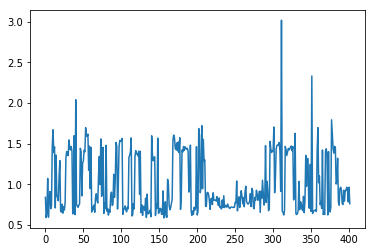

In [65]:
# Podemos ver el rmsd entre la sestructuras
rmsd_ens_pisani = calcRMSD(ens_cdk2)
plot(rmsd_ens_pisani);

In [72]:
# Cálculamos el centro definido por los residuos del pocket
print(calcCenter(ref_strc).round(1))
print(calcCenter(sel_ref_pisani).round(1))
print(calcCenter(sel_ref_ricci).round(1))

[-20.1 215.  119.3]
[-18.4 211.2 113.2]
[-12.5 206.4 113.8]


In [ ]:
# Guardamos el ensamble
# Primero volvemos a INCLUIR TODOS LOS ÁTOMOS!
ens_cdk2.setAtoms( ref_strc )
# Como archivo de ensamble
saveEnsemble(ens_cdk2, "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "ENS_402_cdk2_Pisani_ALL")
# Como archivo PDB
writePDB("../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "PDB_402_cdk2_Pisani_ALL",
        ens_cdk2)


@> Starting iterative superposition:
@> Step #1: RMSD difference = 1.2206e-01
@> Step #2: RMSD difference = 1.7668e-04
@> Step #3: RMSD difference = 2.8013e-07
@> Iterative superposition completed in 0.30s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.09 seconds.


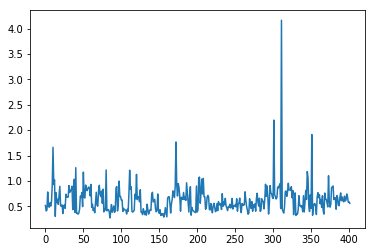

In [52]:
ens_cdk2.setAtoms( sel_ref_ricci )
ens_cdk2.iterpose()
rmsd_ens_ricci = calcRMSD(ens_cdk2)
plot(rmsd_ens_ricci);